In [143]:
# Importing necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Conv2DTranspose, ReLU, Input, LeakyReLU


Reading Dataset

In [144]:
def load_colored_faces(folder_path, target_size=(224, 224)):
    images = []
    labels = []
        
    if os.path.isdir(folder_path):
        # Sort the list of filenames
        filenames = sorted(os.listdir(folder_path))
        for filename in filenames:
            img_path = os.path.join(folder_path, filename)
            
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, target_size)  # Resize to target size
                
                img_array = img / 255.0  # Normalize pixel values to be between 0 and 1
                images.append(img_array)
                labels.append(0)  # Assigning a label (currently set to 0, modify as needed)
            
    return np.array(images), np.array(labels)

def load_pencil_faces(folder_path, target_size=(224, 224)):
    images = []
    labels = []
        
    if os.path.isdir(folder_path):
        # Sort the list of filenames
        filenames = sorted(os.listdir(folder_path))
        for filename in filenames:
            img_path = os.path.join(folder_path, filename)
            
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
            if img is not None:
                img = cv2.resize(img, target_size)  # Resize to target size
                
                img_array = img / 255.0  # Normalize pixel values to be between 0 and 1
                images.append(img_array)
                labels.append(1)  # Assigning a label (currently set to 1, modify as needed)
                
    return np.array(images), np.array(labels)



In [145]:
color_faces,_ = load_colored_faces('/kaggle/input/rgb-faces-vs-pencil-faces/Faces_RGB_vs_Pencil/RGB_Faces')
pencil_faces,_ = load_pencil_faces('/kaggle/input/rgb-faces-vs-pencil-faces/Faces_RGB_vs_Pencil/Pencil_Faces')

In [146]:
print(color_faces.shape,pencil_faces.shape)

(1081, 224, 224, 3) (1081, 224, 224)


Visualization

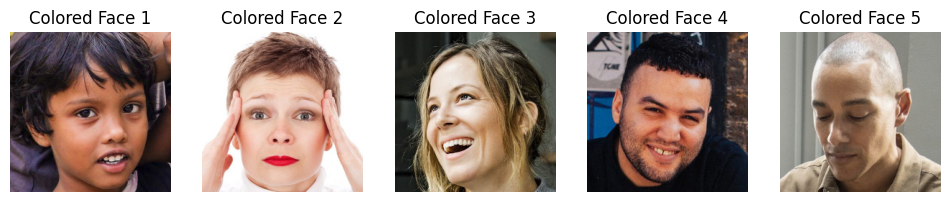

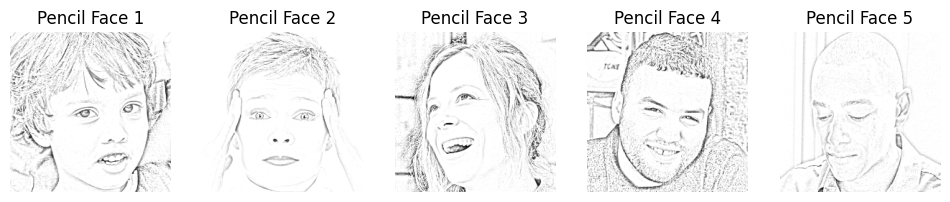

In [147]:
# Display the first 5 images from the dataset
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(color_faces[i])
    plt.title(f"Colored Face {i + 1}")
    plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(pencil_faces[i],cmap='gray')
    plt.title(f"Pencil Face {i + 1}")
    plt.axis('off')

plt.show()

In [148]:
# Expand the dimensions of pencil_faces to make it 3D
pencil_face_three_dim = np.expand_dims(pencil_faces, axis=-1)

# Tile the 3D array along the third dimension to create a 3-channel image
# This is done to match the format of the colored faces (3 channels for RGB)
pencil_face_three_dim = np.tile(pencil_face_three_dim, (1, 1, 3))


In [149]:
pencil_faces = pencil_face_three_dim

In [150]:
print(pencil_faces.shape)
print(color_faces.shape)

(1081, 224, 224, 3)
(1081, 224, 224, 3)


In [151]:
x_train_color,x_test_color,x_train_pencil,x_test_pencil=train_test_split(color_faces,pencil_faces,test_size=0.15,random_state=100,shuffle= True)

In [152]:
print(x_train_color.shape,x_train_pencil.shape)
print(x_test_color.shape,x_test_pencil.shape)

(918, 224, 224, 3) (918, 224, 224, 3)
(163, 224, 224, 3) (163, 224, 224, 3)


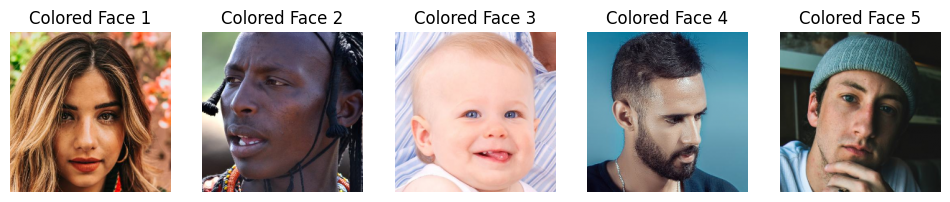

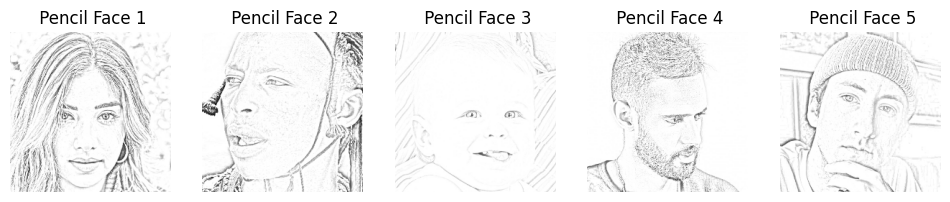

In [153]:
# Display the first 5 images from training dataset
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_color[i])
    plt.title(f"Colored Face {i + 1}")
    plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_pencil[i],cmap='gray')
    plt.title(f" Pencil Face {i + 1}")
    plt.axis('off')
plt.show()

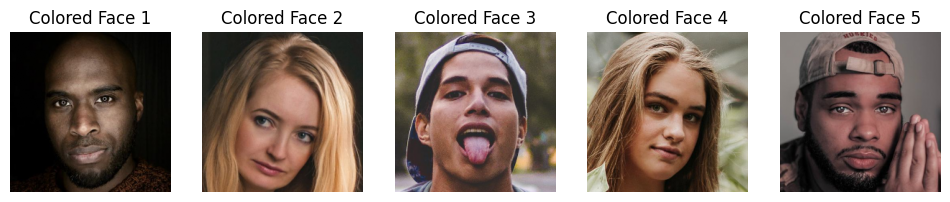

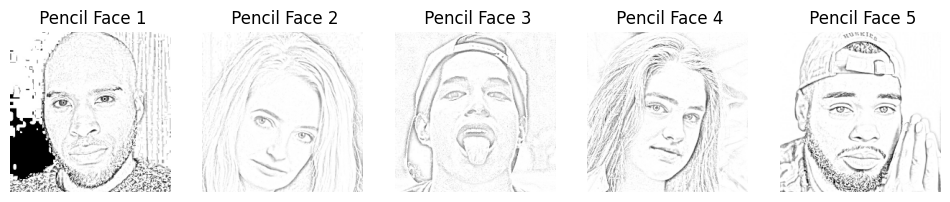

In [154]:
# Display the first 5 images from testing dataset
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_color[i])
    plt.title(f"Colored Face {i + 1}")
    plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_pencil[i],cmap='gray')
    plt.title(f" Pencil Face {i + 1}")
    plt.axis('off')
plt.show()

Building Model

An autoencoder is a type of neural network architecture that aims to learn efficient representations of the input data. It consists of two main parts: an encoder and a decoder. Let's dive into each part and the overall working of an autoencoder:

Encoder:

The encoder takes the input data and compresses it into a latent space representation.
It typically consists of one or more layers of neural network units (such as convolutional layers in the case of image data) that reduce the dimensionality of the input data.
The final layer of the encoder produces a compressed representation of the input data, often referred to as the "code" or "latent representation".
The latent representation captures the most important features of the input data in a lower-dimensional space.


Decoder:

The decoder takes the compressed representation (latent space) produced by the encoder and reconstructs the original input data from it.
It consists of one or more layers of neural network units that upsample and reconstruct the original input data.
The decoder's output should ideally be as close as possible to the original input data.
The decoder's architecture is usually symmetric to the encoder's architecture, mirroring the layers and their configurations.


Training Process:

During training, the autoencoder aims to minimize the difference between the input data and the output data (reconstruction loss).
It does this by optimizing the network parameters (weights and biases) using backpropagation and gradient descent techniques.
The reconstruction loss is typically measured using a loss function such as Mean Squared Error (MSE) or Binary Cross-Entropy Loss, depending on the nature of the input data.
The encoder learns to extract meaningful features from the input data while the decoder learns to reconstruct the original input data from these features.
Once trained, the encoder can be used to extract useful features from input data, and the decoder can be used to generate new data samples by sampling from the latent space.


Applications:

Autoencoders have various applications, including dimensionality reduction, feature learning, data denoising, anomaly detection, and generative modeling.
In dimensionality reduction, the encoder's compressed representation can be used as input for other machine learning algorithms, reducing the computational complexity and improving performance.
In generative modeling, autoencoders can be trained to generate new data samples similar to the training data by sampling from the learned latent space.


Variants:

Variants of autoencoders include sparse autoencoders, denoising autoencoders, variational autoencoders (VAEs), and convolutional autoencoders, each with its own specific architecture and training objectives.

Overall, autoencoders are powerful neural network architectures that can learn useful representations of data in an unsupervised manner, making them versatile tools for various machine learning tasks.

In [155]:
# Define Encoder architecture
Encoder = Sequential()

# Add the first convolutional layer with 32 filters, each with a size of (2,2),
# using He normal initialization, padding to maintain the same input size, and LeakyReLU activation function
Encoder.add(Conv2D(32, (2, 2), kernel_initializer='he_normal', padding="same", use_bias=True))
Encoder.add(BatchNormalization())  # Add batch normalization to stabilize training
Encoder.add(LeakyReLU())  # Apply LeakyReLU activation function

# Add the second convolutional layer with 64 filters, similar settings to the previous layer
Encoder.add(Conv2D(64, (2, 2), kernel_initializer='he_normal', padding="same", use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(LeakyReLU())

# Add the third convolutional layer with 128 filters, similar settings to the previous layers
Encoder.add(Conv2D(128, (2, 2), kernel_initializer='he_normal', padding="same", use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(LeakyReLU())

# Define Decoder architecture
Decoder = Sequential()

# Add the first transposed convolutional layer with 64 filters, each with a size of (2,2),
# padding to maintain the same output size, and LeakyReLU activation function
Decoder.add(Conv2DTranspose(64, (2, 2), padding="same", use_bias=True))
Decoder.add(BatchNormalization())  # Add batch normalization
Decoder.add(LeakyReLU())  # Apply LeakyReLU activation function

# Add the second transposed convolutional layer with 32 filters, similar settings to the previous layer
Decoder.add(Conv2DTranspose(32, (2, 2), padding="same", use_bias=True))
Decoder.add(BatchNormalization())
Decoder.add(LeakyReLU())

# Add the third transposed convolutional layer with 1 filter, similar settings to the previous layers
Decoder.add(Conv2DTranspose(1, (2, 2), padding="same", use_bias=True))
Decoder.add(BatchNormalization())
Decoder.add(LeakyReLU())


In [156]:
Auto_Encoder = Sequential([Encoder,Decoder])

In [157]:
Auto_Encoder.compile(loss="mse",optimizer='adam',metrics=['accuracy'])

In [169]:
Auto_Encoder.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_39 (Sequential)      │ (None, 224, 224, 128)  │        42,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_40 (Sequential)      │ (None, 224, 224, 1)    │        41,573 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,829 (979.80 KB)

 Trainable params: 83,395 (325.76 KB)

 Non-trainable params: 642 (2.51 KB)

 Optimizer params: 166,792 (651.54 KB)

In [158]:
# Train your model and get the history
history = Auto_Encoder.fit(x_train_color, x_train_pencil, epochs=70, batch_size=16, validation_split=0.15)

Epoch 1/70
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 736ms/step - accuracy: 0.2561 - loss: 0.6511 - val_accuracy: 0.0106 - val_loss: 0.3625
Epoch 2/70
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.3215 - loss: 0.5523 - val_accuracy: 0.1039 - val_loss: 0.2396
Epoch 3/70
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.3248 - loss: 0.5037 - val_accuracy: 0.3619 - val_loss: 0.1709
Epoch 4/70
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.3310 - loss: 0.4566 - val_accuracy: 0.3683 - val_loss: 0.1413
Epoch 5/70
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.3378 - loss: 0.4145 - val_accuracy: 0.3670 - val_loss: 0.1206
Epoch 6/70
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.3401 - loss: 0.3771 - val_accuracy: 0.3673 - val_loss: 0.1365
Epoch 7/70
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.3423 - loss: 0.3344 - val_accuracy: 0.3674 - val_loss: 0.1294
Epoch 8/70
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.3531 - loss: 0.2946 - val_accu

In [159]:
pred_pencil_faces = Auto_Encoder.predict(x_test_color)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

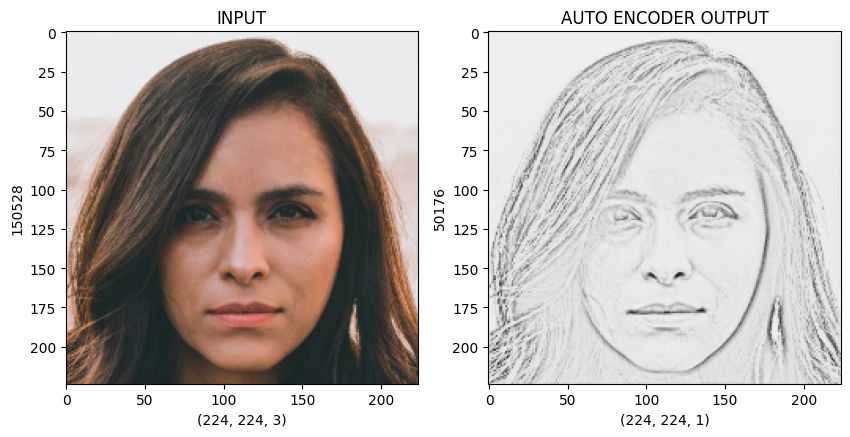

In [172]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 130

Original_Img = x_test_color[prediction_img_number]
Predict_Image_AE = pred_pencil_faces[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE,cmap='gray')
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")

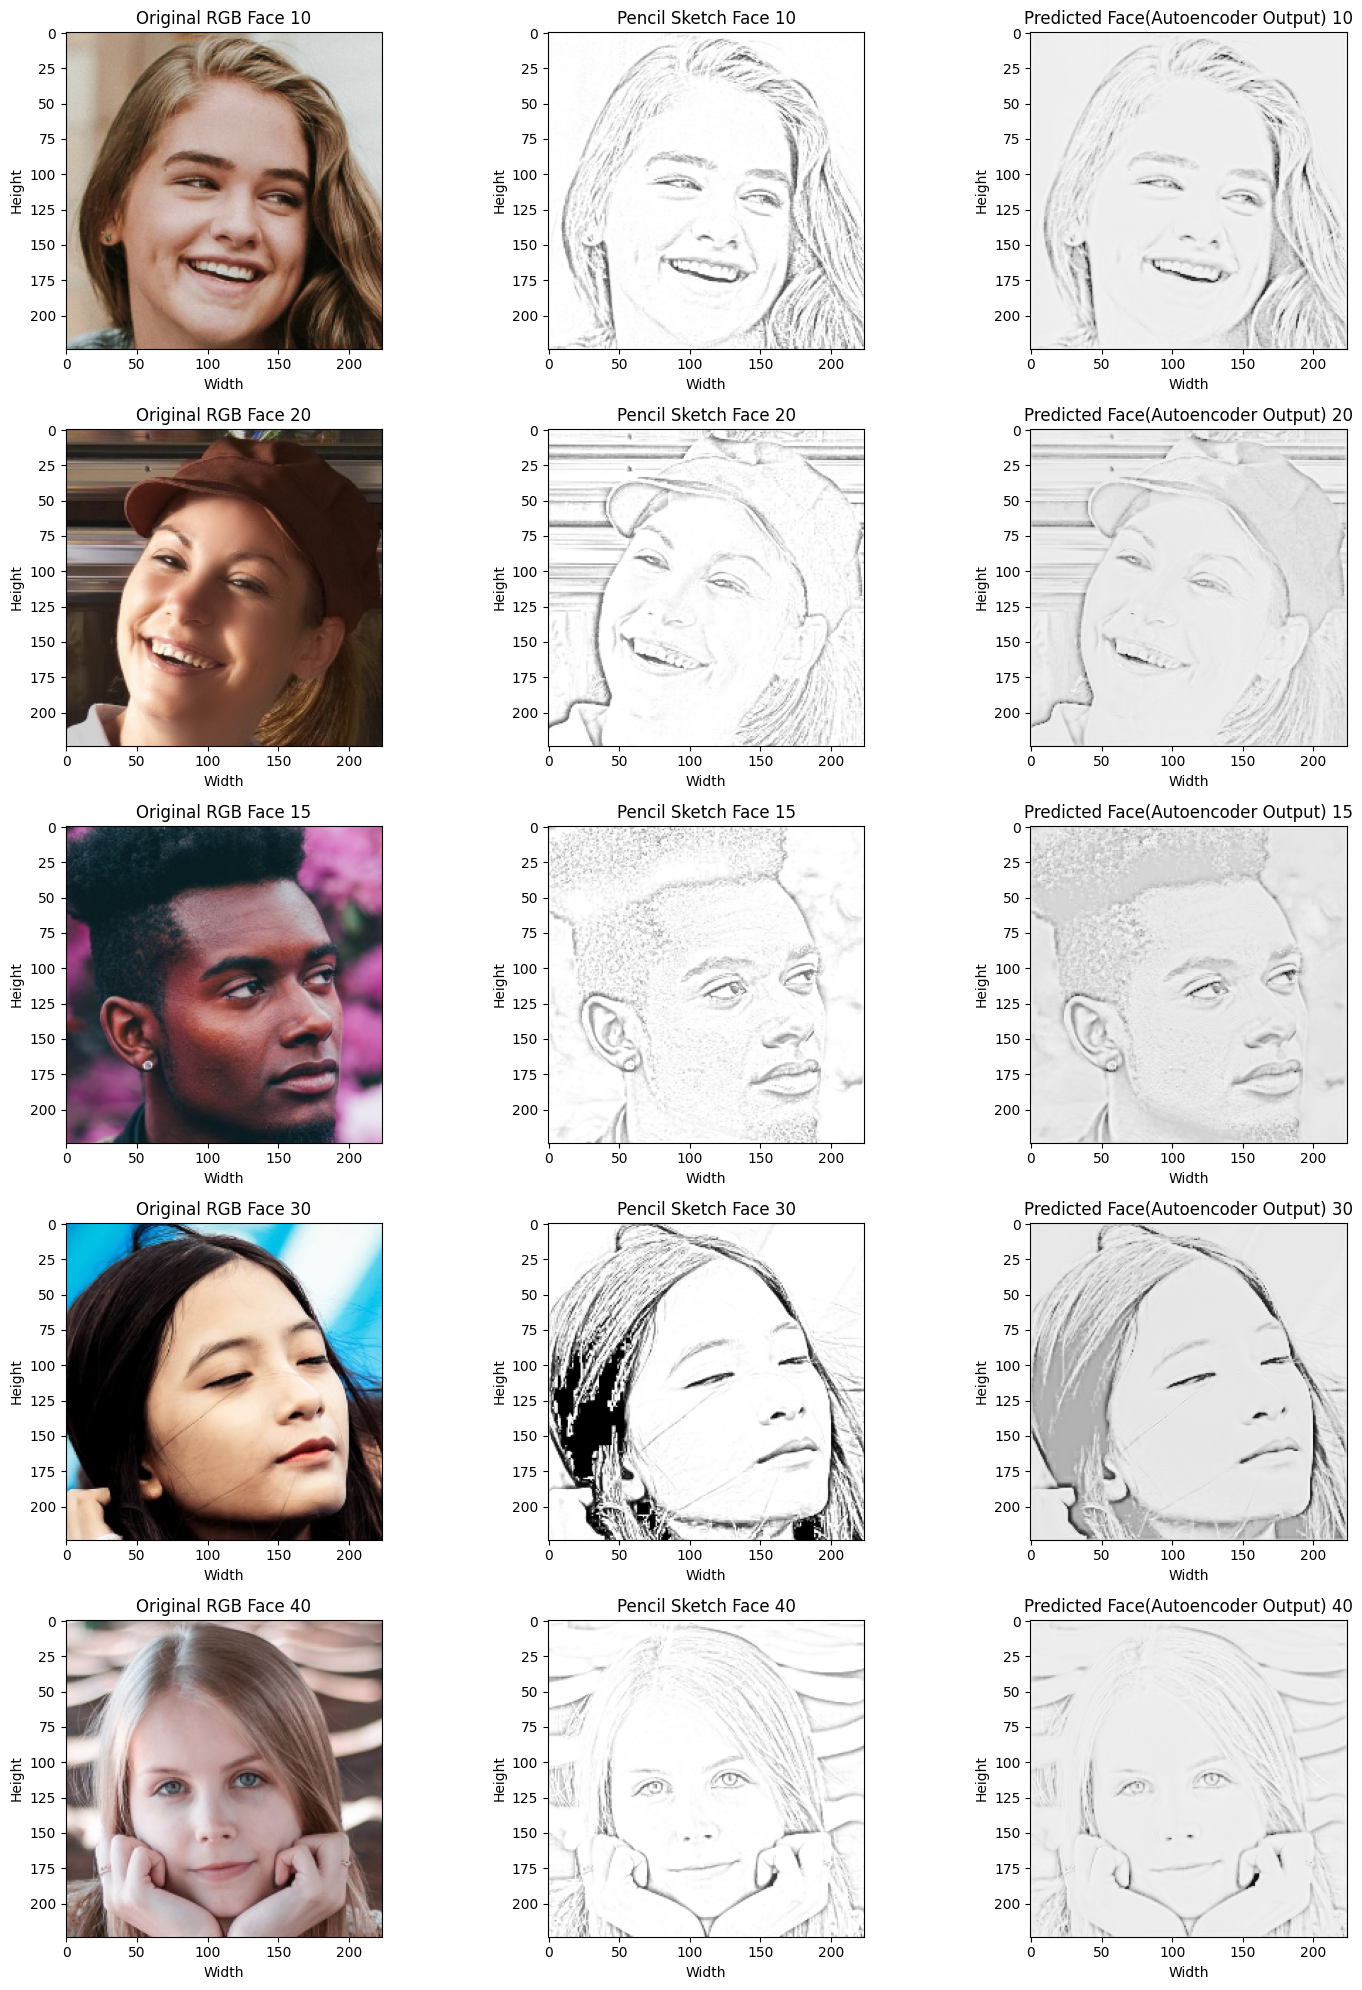

In [166]:
# Select image numbers for visualization
prediction_img_numbers = [10, 20, 15, 30, 40]

# Create a subplot figure with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Loop over each selected image number
for i, img_number in enumerate(prediction_img_numbers):
    # Original RGB image
    axes[i, 0].imshow(x_test_color[img_number])
    axes[i, 0].set_xlabel("Width")
    axes[i, 0].set_ylabel("Height")
    axes[i, 0].set_title(f"Original RGB Face {img_number}")
    
    # Pencil sketch image
    axes[i, 1].imshow(x_test_pencil[img_number], cmap='gray')
    axes[i, 1].set_xlabel("Width")
    axes[i, 1].set_ylabel("Height")
    axes[i, 1].set_title(f"Pencil Sketch Face {img_number}")
    
    # Predicted image from autoencoder
    axes[i, 2].imshow(pred_gray_images[img_number], cmap='gray')
    axes[i, 2].set_xlabel("Width")
    axes[i, 2].set_ylabel("Height")
    axes[i, 2].set_title(f"Predicted Face(Autoencoder Output) {img_number}")

plt.tight_layout()
plt.show()


In [162]:
# Visualize the training history
def plot_training_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    # Plot other metrics if available (e.g., accuracy)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Training and Validation Accuracy')
        plt.show()


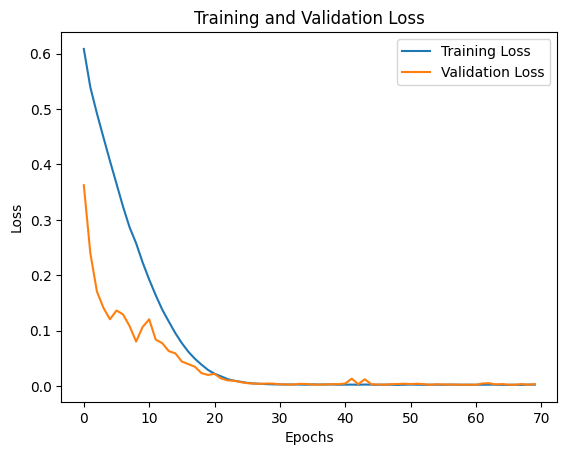

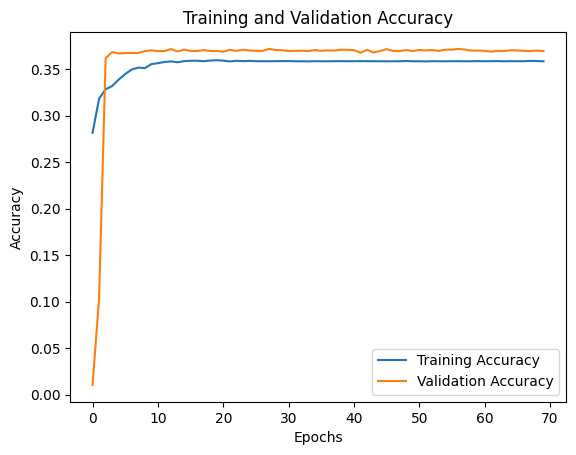

In [163]:
# Visualize the training history
plot_training_history(history)